In [12]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [13]:
df = pd.read_csv('cupid-small.csv')
df.head(5)

age       body_type    drinks       drugs  \
0   22  a little extra  socially       never   
1   35         average     often   sometimes   
2   38            thin  socially  don't know   
3   23            thin  socially  don't know   
4   29        athletic  socially       never   

                           education            ethnicity  height  income  \
0      working on college/university         asian, white    75.0      -1   
1              working on space camp                white    70.0   80000   
2     graduated from masters program           don't know    68.0      -1   
3      working on college/university                white    71.0   20000   
4  graduated from college/university  asian, black, other    66.0      -1   

                           job                         location  \
0               transportation  south san francisco, california   
1         hospitality / travel              oakland, california   
2                   don't know        san francisco, california   
3                      student             berkeley, california   
4  artistic / musical / writer        san francisco, california   

        last_online orientation sex                                sign  \
0  2012-06-28-20-30    straight   m                              gemini   
1  2012-06-29-21-41    straight   m                              cancer   
2  2012-06-27-09-10    straight   m  pisces but it doesn&rsquo;t matter   
3  2012-06-28-14-22    straight   m                              pisces   
4  2012-06-27-21-26    straight   m                            aquarius   

                                   religion     smokes     status  \
0     agnosticism and very serious about it  sometimes     single   
1  agnosticism but not too serious about it         no     single   
2                                don't know         no  available   
3                                don't know         no     single   
4                                don't know         no     single   

                                         description  
0  about me:<br />\n<br />\ni would love to think...  
1  i am a chef: this is what that means.<br />\n1...  
2  i'm not ashamed of much, but writing public te...  
3  i work in a library and go to school. . . read...  
4  hey how's it going? currently vague on the pro...

In [14]:
#Removing the HTML tags.
def clean_text_list(text_list):
    cleaned_texts = []
    for text in text_list:
        # Converting to lowercase
        text = str(text)
        text = text.lower()
        
        # Removing HTML tags and attributes
        text = re.sub(r"<[^>]+>", "", text)
        
        # Removing non-alphabetic characters
        text = re.sub(r"[^a-zA-Z\s]", "", text)
        
        # Removing extra whitespaces
        text = re.sub(r"\s+", " ", text)
        
        cleaned_texts.append(text.strip())
    
    return cleaned_texts


In [15]:
descriptions = []
for i in range(len(df)):
    descriptions.append(df.description[i])
#print(descriptions[80:88])

cleaned_descriptions = clean_text_list(descriptions)
print("--------------------------------------------------------------------------------------------------------------")
print(len(cleaned_descriptions))
#print(cleaned_descriptions[81:82])

file_path = "okcupid_descriptions.txt"

# Opening the file in write mode
with open(file_path, "w") as file:
    # Looping through the list and write each item to the file
    for text in cleaned_descriptions[0:32000]:
        file.write(text + "\n")  # Add a newline character after each item

print("Text successfully written to", file_path)


--------------------------------------------------------------------------------------------------------------
25000
Text successfully written to okcupid_descriptions.txt


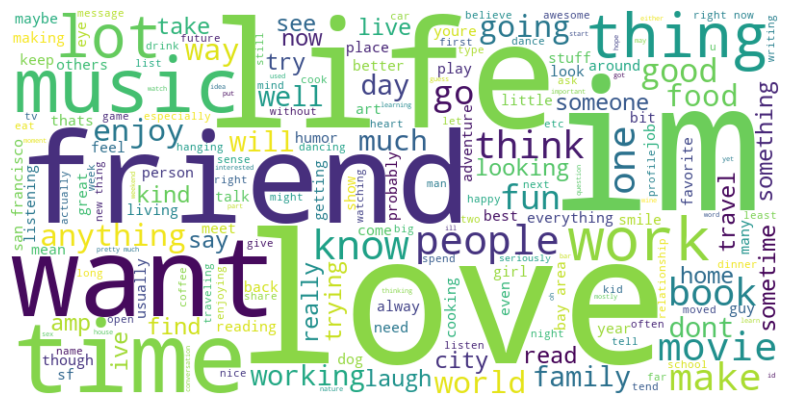

In [16]:
combined_text = ' '.join(cleaned_descriptions)

# Generating the word cloud using a lambda function to parse the text
generate_wordcloud = lambda text: WordCloud(width=800, height=400, background_color='white').generate(text)
wordcloud = generate_wordcloud(combined_text)

# Displaying the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#Just making sure how the cleaned text is.
combined_text[0:1000]

'about me i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy cant say i can tell the difference i love to talk about ideas and concepts i forge odd metaphors instead of reciting cliches like the simularities between a friend of mines house and an underwater salt mine my favorite word is salt by the way weird choice i know to me most things in life are better as metaphors i seek to make myself a little better everyday in some productively lazy way got tired of tying my shoes considered hiring a five year old but would probably have to tie both of our shoes decided to only wear leather shoes dress shoes about you you love to have really serious really deep conversations about really silly stuff you have to be willing to snap me out of a light hearted rant with a kiss you dont have to be funny but you have to be able to make me laugh you should be able to bend spoons with your mind and telepathically make me smile while i 

We got the most frequently used words but they don't convey much useful information. First let's try to manually get useful words with our understanding of english language by filtering them with verbs since they usually represent what people do or like to do.

In [18]:
past_tense_suffixes = ["ed", "d", "t", "ied"]
present_tense_suffixes = ["s", "es", "ing"]
future_tense_suffixes = ["will", "shall", "be going to"]

# Combining all the suffixes into one list
verb_suffixes = past_tense_suffixes + present_tense_suffixes + future_tense_suffixes
verb_suffixes

['ed', 'd', 't', 'ied', 's', 'es', 'ing', 'will', 'shall', 'be going to']

In [19]:
# Tokenizing the document into words
words = combined_text.split()

# Initializing a dictionary to store verb counts
verb_counts = {}

# Iterating through the words and count verbs
for word in words:
    # Removing punctuation
    word = word.strip('.,!?()[]{}"\'')
    
    # Checking if the word ends with any verb suffix
    for suffix in verb_suffixes:
        if word.lower().endswith(suffix):
            # Incrementing the count for this verb
            verb_counts[word.lower()] = verb_counts.get(word.lower(), 0) + 1

# Sorting and displaying the most common verbs
sorted_verbs = sorted(verb_counts.items(), key=lambda x: x[1], reverse=True)
print("Most common verbs:")
for verb, count in sorted_verbs:
    print(f"{verb}: {count}")

Most common verbs:
and: 301751
that: 71710
is: 63642
it: 59166
but: 54589
at: 49257
not: 42070
movies: 39504
out: 39115
as: 37266
good: 37266
friends: 33799
about: 32083
just: 28500
things: 27322
what: 25944
food: 25863
this: 25379
dont: 24735
its: 21110
get: 20383
want: 18958
being: 18106
books: 16824
anything: 15998
going: 15473
was: 14820
sometimes: 14582
will: 14339
would: 14230
most: 13844
lot: 13532
working: 12603
always: 12292
looking: 12269
need: 11532
something: 11470
world: 11398
making: 11369
great: 11076
eyes: 10514
games: 10294
trying: 10054
find: 9995
years: 9679
read: 9596
around: 8881
right: 8744
times: 8668
doing: 8501
moved: 8400
reading: 8209
has: 8171
interested: 8152
places: 7800
everything: 7622
having: 7468
getting: 7312
shows: 7310
next: 7306
makes: 7262
best: 6993
thing: 6993
watching: 6868
art: 6842
cooking: 6666
yes: 6652
meet: 6583
first: 6527
could: 6521
night: 6494
thats: 6480
kind: 6421
living: 6124
playing: 6084
old: 5984
theres: 5818
dancing: 5714
hard:

The method above does result in most common words filtered through most common verb suffixes. But still, doesn't yield good results. Therefore I would now make a list of most common verbs in english language and filter through them.I am aware that it might miss the other uncommon verbs but sometimes we have to make sure that perfect isn't the enemy of the good.

In [20]:
from collections import Counter



# Defining a regular expression pattern to match words ending with "ing"
ing_pattern = r'\b\w+ing\b'

# Initializing a list to store words ending with "ing"
ing_words = []

# Splitting the text into sentences
sentences = re.split(r'[.!?]', combined_text)

# Iterating through sentences
for sentence in sentences:
    # Extracting words ending with "ing"
    ing_matches = re.findall(ing_pattern, sentence)
    ing_words.extend(ing_matches)

# Counting the frequency of each word ending with "ing"
word_freq = Counter(ing_words)

# Creating a dictionary sorted by frequency
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Printing the sorted dictionary of words ending with "ing"
print("Words ending with 'ing' sorted by frequency:")
for word, freq in sorted_word_freq.items():
    print(f"{word}: {freq}")

Words ending with 'ing' sorted by frequency:
being: 18106
anything: 15998
going: 15473
working: 12603
looking: 12269
something: 11470
making: 11369
trying: 10054
doing: 8501
reading: 8209
everything: 7622
having: 7468
getting: 7312
thing: 6993
watching: 6868
cooking: 6666
living: 6124
playing: 6084
dancing: 5714
listening: 5125
learning: 4751
thinking: 4392
interesting: 4335
writing: 4327
taking: 4297
enjoying: 4201
traveling: 4095
hanging: 3919
eating: 3461
finding: 3370
talking: 3335
amazing: 3275
hiking: 3224
exploring: 3199
running: 3187
meeting: 3106
nothing: 3062
laughing: 2956
loving: 2831
spending: 2409
drinking: 2375
walking: 2264
dating: 2216
seeing: 2214
staying: 2044
willing: 2004
relaxing: 1804
during: 1713
planning: 1699
giving: 1689
camping: 1674
singing: 1609
morning: 1580
teaching: 1571
building: 1521
moving: 1513
climbing: 1491
breaking: 1437
keeping: 1435
outgoing: 1432
feeling: 1406
studying: 1395
riding: 1385
biking: 1363
starting: 1348
helping: 1316
coming: 1297
d

In [21]:
ing_pattern = r'\b\w+\b \w+ing\b \b\w+\b'

# Initializing a list to store matched word combinations
word_combinations = []

# Splitting the text into sentences
sentences = re.split(r'[.!?]', combined_text)

# Iterating through sentences
for sentence in sentences:
    # Extracting word combinations in the specified format
    combinations = re.findall(ing_pattern, sentence)
    word_combinations.extend(combinations)

# Counting the frequency of each word combination
combination_freq = Counter(word_combinations)

# Creating a dictionary sorted by frequency
sorted_combination_freq = dict(sorted(combination_freq.items(), key=lambda item: item[1], reverse=True))

# Printing the most common word combinations
print("Word combinations (word + verb with 'ing' + word) sorted by frequency:")
for combination, freq in sorted_combination_freq.items():
    print(f"{combination}: {freq}")

Word combinations (word + verb with 'ing' + word) sorted by frequency:
im looking for: 1606
im going to: 1382
am looking for: 1077
im trying to: 930
time thinking about: 679
are looking for: 655
and trying to: 557
youre looking for: 530
im working on: 508
am trying to: 481
not looking for: 467
am going to: 448
not going to: 380
the walking dead: 380
love going to: 369
always looking for: 368
im looking to: 335
just trying to: 306
is going to: 290
easy going and: 284
that being said: 284
and looking for: 281
and having a: 271
the meaning of: 267
and going to: 263
im willing to: 259
love trying new: 251
like going to: 242
and watching a: 242
been listening to: 238
been living in: 235
or hanging out: 232
am working on: 230
just looking for: 229
or watching a: 225
of being a: 225
am looking to: 221
are willing to: 221
and having fun: 220
im hoping to: 209
try anything once: 209
home watching a: 204
whats going on: 203
still trying to: 202
and loathing in: 199
books anything by: 196
just ha

or doing yoga: 5
read anything but: 5
busy working on: 5
is meeting new: 5
busy trying to: 5
am aiming to: 5
easy going sometimes: 5
me riding my: 5
in checking out: 5
with going out: 5
i talking about: 5
like nothing more: 5
and trying all: 5
love doing the: 5
is working for: 5
and seeing my: 5
or engaging in: 5
of something else: 5
like cooking dinner: 5
too embarrassing to: 5
of living with: 5
me looking to: 5
for being alive: 5
to everything im: 5
and sharing in: 5
the beginning stages: 5
as listening to: 5
love making my: 5
in getting a: 5
at keeping up: 5
of thing but: 5
a blessing i: 5
and soaking in: 5
do something if: 5
one thing thats: 5
francisco looking to: 5
books anything written: 5
like biking or: 5
to doing more: 5
my dancing shoes: 5
but looking forward: 5
to meeting in: 5
parallel parking skills: 5
worst thing i: 5
about messaging me: 5
at saying what: 5
things working with: 5
movies king of: 5
for something real: 5
of learning something: 5
same thing in: 5
like danci

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



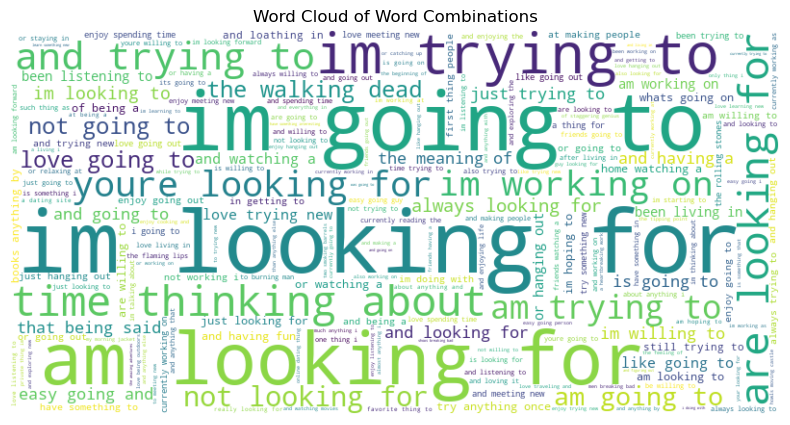

In [22]:
# Creating a word cloud from the word combinations
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(combination_freq)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Word Combinations')
plt.show()

The best insight here is it is difficult to filter the words manually without any imported natural language processing libraries as we see the verbs and the combined words are no way near to giving insights of what people like. Therefore the next stage is to use a natural language processing library.